# Exploratory Data Analysis

First I load in some modules and color settings.

In [1]:
# %load src/plot_settings.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

plt.style.use('seaborn')
%matplotlib inline

twi = '#DCB8E7' #Pale, light grayish mulberry
twi_blu = '#273873' #Dark sapphire blue
twi_pur = '#662D8A' #Moderate purple
twi_pnk = '#ED438D' #Brilliant raspberry


## Loading data

Time to use the data from my pipeline.

In [2]:
# Read file obtained from my pipeline
usage_df = pd.read_csv('data/usage_timeseries.csv', index_col=0)
usage_df.head()

,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,...,Week 22,Week 23,Week 24,Week 25,Week 26,Week 27,Week 28,Week 29,Week 30,Week 31
Weapon Name,,,,,,,,,,,,,,,,,,,,,
Splattershot,0.1710,0.1598,0.1548,0.1462,0.0941,0.0940,0.0852,0.0887,0.0858,0.0793,...,0.0652,0.0652,0.0563,0.0535,0.0461,0.0429,0.0444,0.0422,0.0372,0.0355
Range Blaster,0.0683,0.0639,0.0617,0.0634,0.0577,0.0541,0.0396,0.0324,0.0298,0.0238,...,0.0203,0.0232,0.0208,0.0198,0.0151,0.0183,0.0155,0.0167,0.0133,0.0130
Splat Roller,0.0671,0.0693,0.0755,0.0712,0.0742,0.0759,0.0766,0.0802,0.0827,0.0801,...,0.0613,0.0656,0.0650,0.0644,0.0593,0.0467,0.0499,0.0506,0.0464,0.0481
N-ZAP '85,0.0615,0.0665,0.0714,0.0693,0.0776,0.1217,0.1369,0.1290,0.1301,0.1416,...,0.0738,0.0713,0.0785,0.0771,0.0635,0.0596,0.0642,0.0653,0.0663,0.0619
Splat Brella,0.0494,0.0583,0.0591,0.0615,0.0570,0.0529,0.0312,0.0220,0.0199,0.0178,...,0.0207,0.0128,0.0123,0.0122,0.0136,0.0116,0.0102,0.0100,0.0127,0.0119


In [3]:
# A quick look at some statistics
usage_df.describe()

,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,...,Week 22,Week 23,Week 24,Week 25,Week 26,Week 27,Week 28,Week 29,Week 30,Week 31
count,55.000000,55.000000,56.000000,57.000000,58.000000,59.000000,61.000000,62.000000,62.000000,64.000000,...,76.000000,77.000000,78.000000,79.000000,84.000000,84.000000,84.000000,84.000000,84.000000,88.000000
mean,0.018176,0.018185,0.017857,0.017542,0.017245,0.016944,0.016397,0.016126,0.016126,0.015625,...,0.013155,0.012990,0.012822,0.012653,0.011902,0.011900,0.011908,0.011905,0.011904,0.011365
std,0.026351,0.025407,0.025232,0.024279,0.020734,0.022918,0.022495,0.022204,0.022496,0.022867,...,0.015316,0.015382,0.015139,0.014638,0.012257,0.012348,0.012694,0.012796,0.012711,0.012278
min,0.000900,0.000900,0.000800,0.000600,0.000900,0.000700,0.000800,0.001000,0.000800,0.001100,...,0.000800,0.000900,0.001000,0.000700,0.000600,0.000900,0.000600,0.000900,0.000600,0.000100
25%,0.005000,0.005050,0.004950,0.004900,0.004500,0.004800,0.005500,0.004925,0.004525,0.004850,...,0.003875,0.004000,0.003675,0.004050,0.004200,0.004000,0.004275,0.003850,0.003775,0.003600
50%,0.010400,0.010500,0.009150,0.009700,0.009450,0.008400,0.008300,0.008200,0.008250,0.008000,...,0.008250,0.008200,0.007300,0.007300,0.007700,0.008350,0.008050,0.007950,0.007950,0.007050
75%,0.019200,0.018200,0.017650,0.017100,0.018875,0.018150,0.018000,0.017700,0.017175,0.016200,...,0.015125,0.014600,0.014675,0.014800,0.013875,0.014425,0.013925,0.014625,0.014875,0.015050
max,0.171000,0.159800,0.154800,0.146200,0.094100,0.121700,0.136900,0.129000,0.130100,0.141600,...,0.073800,0.071300,0.078500,0.077100,0.063500,0.059600,0.064200,0.065300,0.066300,0.061900


The missing values actually work to my advantage here, the addition of new weapons is represented by the weapon count increasing and the mean usage decreases due to there being more weapons.

## Spaghetti plot visualization

A good way to look at these multiple timeseries is with a spaghetti plot. It is not very good for presenting but can help me visualize data.

In [4]:
def spaghetti(df, name='Spaghetti Plot'):
    """ 
    Makes a spaghetti plot out of a dataframe, includes a mean line.
  
    Parameters: 
    df (df): a Pandas dataframe indexed with the variables to plot and columns containing timeframe data.
    name (str): Name of plot.
  
    Returns: 
    nothing, but prints a plot
    """
        
    # Transpose for plotting
    dft = df.transpose()
    
    # Make new collumn to plot x
    dft['x'] = np.arange(1, dft.shape[0]+1)

    # multiple line plot
    fig, ax = plt.subplots(1, figsize=(16, 8))
    num=0
    for column in dft.drop('x', axis=1):
        num+=1
        ax.plot(dft['x'], dft[column], marker='', linewidth=2, alpha=.7, label=column)
        
    # Plot a mean line
    x = np.arange(1,32)
    ax.plot(x, df.mean()[x-1], linewidth=6, color='black')

    # Add legend
    ax.legend(loc=2, ncol=2)

    # Add titles
    plt.title(name, loc='center', fontsize=30, fontweight=0)
    plt.xlabel("Time (Weeks starting from 10/28/17)", fontsize=20)
    plt.ylabel("Usage", fontsize=20);

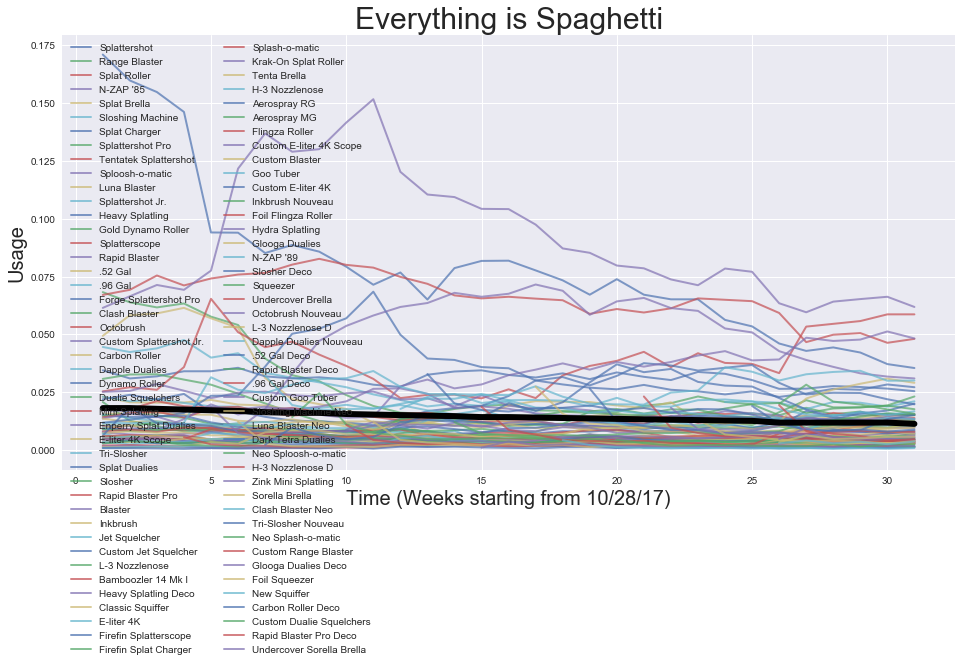

In [5]:
# spaghetti plot everything
spaghetti(usage_df, 'Everything is Spaghetti')

This plot is next to useless, and not quite worth the effort ot make it actually readable. However the highest few lines really stand out and have some interesting peaks and valleys. Time to look at a smaller subset.

## A better spaghetti
I decide to took at only the most used weapons according to multiple criteria.
* Usage in final week: this weapon was popular towards the end when the meta became more stable.
* Average usage: this weapon was popular throughout.
* Peak usage: this weapon was extremely popular at one point.

In [6]:
# Top 10 based on usage in final week
final = usage_df.sort_values(by=['Week 31'], ascending=False).head(10)

In [7]:
# Top 10 based on average use
tdf = usage_df.transpose()
overall = tdf.reindex(tdf.mean().sort_values(ascending=False).index, axis=1).transpose().head(10)
# In this case I use mean instead of sum since mean ignores the empty values
# which compensates for weapons added later in the game.

In [8]:
# Top 10 based on peak usage
tdf = usage_df.transpose()
peak = tdf.reindex(tdf.max().sort_values(ascending=False).index, axis=1).transpose().head(10)

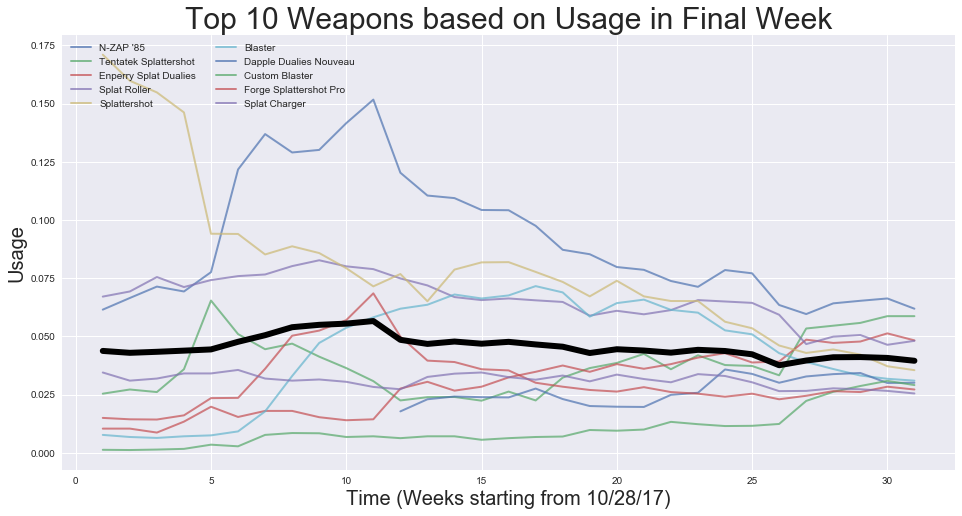

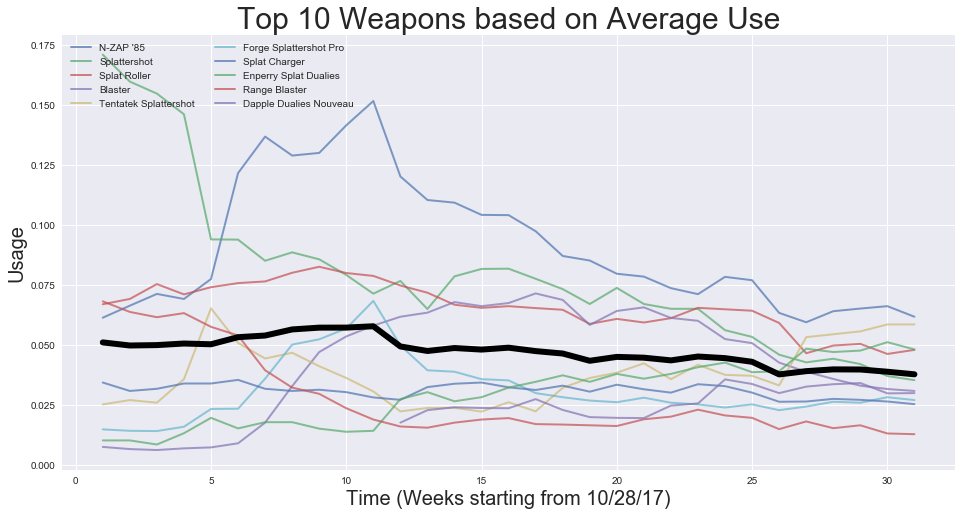

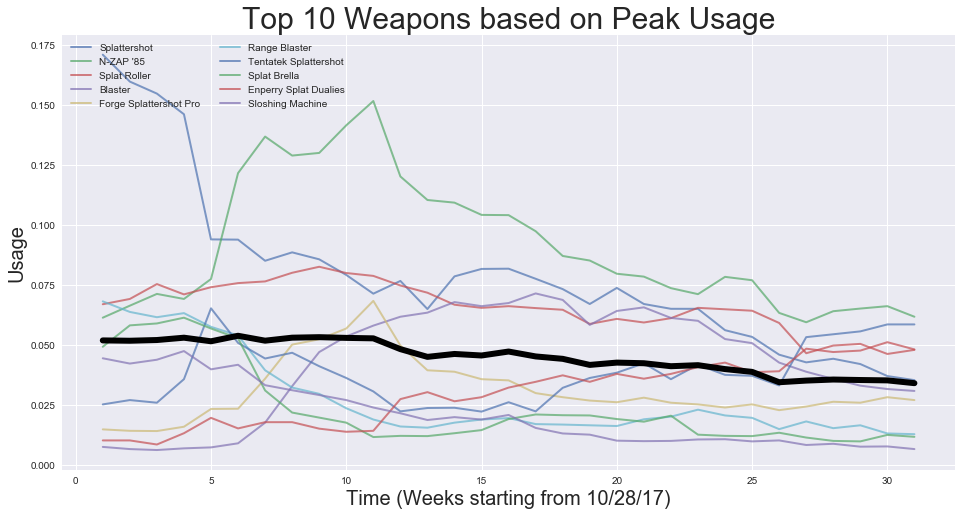

In [9]:
# Plot them all! There's definitely a more elegant way to do this but my function is rudimentary and this works
spaghetti(final, 'Top 10 Weapons based on Usage in Final Week')
spaghetti(overall, 'Top 10 Weapons based on Average Use')
spaghetti(peak, 'Top 10 Weapons based on Peak Usage')

A few observations:
* There were a quite a few weapons that showed up in all 3 plots, meaning that they were definitely used often, and a meta is fundamentally based on usage.
* The peaks and highest fluctuations happen early, before 15 weeks, while towards the end all the usage seems to converge. Metas are usually most unstable early in a game's lifetime and tend to stabilize as players figure out the best strategies.
* There is a steady decline in the mean usage on all the plots, this is attributed to more weapons being added in the game leading to a lower average usage proportion.


## Further investigation of Top Weapons

I want to look at the weapons that showed up in all 3 top 10 lists and try to uncover the reasons for their high usage.

In [10]:
# Find the weapons present in all 3 previous plots
top = []
for element in usage_df.index:
    if element in final.index and element in overall.index and element in peak.index:
        top.append(element)
top

['Splattershot',
 'Splat Roller',
 "N-ZAP '85",
 'Tentatek Splattershot',
 'Forge Splattershot Pro',
 'Enperry Splat Dualies',
 'Blaster']

There are a lot of shooter (rifle) class weapons in this list, 4 out of 7. There are 1 each of roller (melee), dualies (dual pistols), and blaster (explosive). My personal favorite from this list are the Enperry Splat Dualies.
![Enperry Splat Dualies](https://cdn.wikimg.net/en/splatoonwiki/images/6/69/S2_Weapon_Main_Enperry_Splat_Dualies.png)

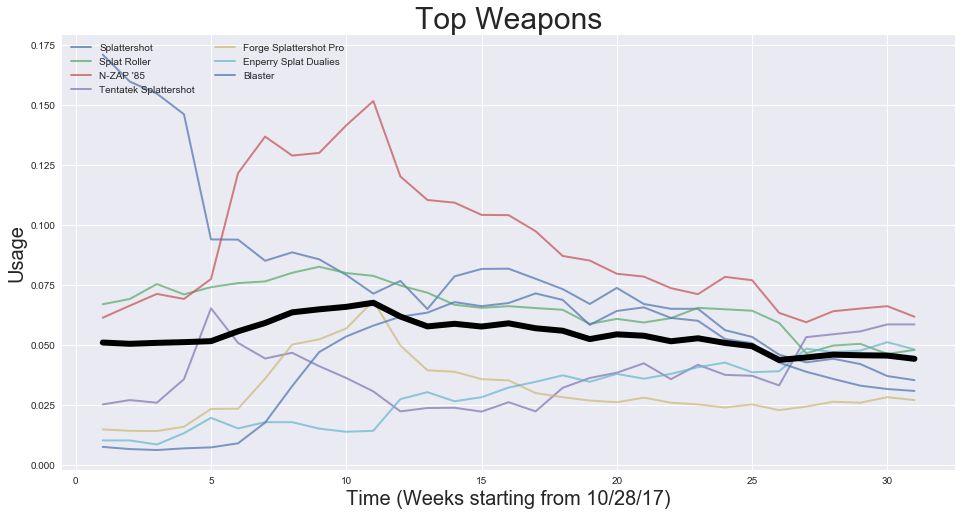

In [11]:
# Plot the top weapons
spaghetti(usage_df.loc[top,:], 'Top Weapons')

Some observations:
* Two weapons that caught my attention are the Splattershot and Tentatek Splattershot. These are variant weapons, where they have an identical main (gun) but a different sub (grenade) and special. The Splattershot starts as the most used weapon but is eventually overtaken by the Tentatek. I think this is due to patches buffing (increasing the power of) the Tentatek's Inkjet special but I cannot test that with current data.
* At a glance, the N-ZAP '85 appears to be the most consistently popular weapon. It is quite infamous in the game for being 'overused', expecially in high-level team play where this data is from. I would like to analyze if it was truly overused.

I would like to see if there are any correlations so I used a seaborn heatmap.

In [45]:
def heatmapper(df):
    """ 
    Draws a simple heatmap of a dataframe based on correlation of the rows.
  
    Parameters: 
    df (df): a Pandas dataframe indexed with the items to calculate distribution on.
  
    Returns: 
    nothing, but prints a plot
    """
    
    # calculate the correlation matrix
    corr = df.transpose().corr()

    # plot the heatmap
    sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap="coolwarm");

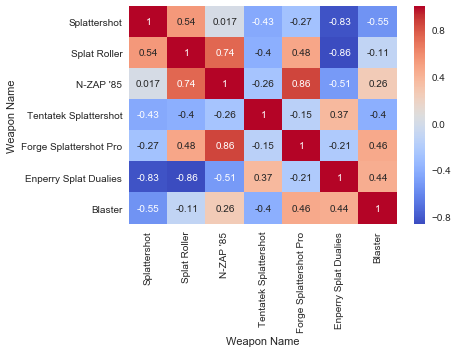

In [63]:
# generate heatmap of top weapons
heatmapper(usage_df.loc[top,:])

These are the strongest correletions accompanied by my best guess as to why based on game knowledge.

Positive Correlations

+ N-ZAP '85 and Splat Roller
    * Not sure, may be coincidence since both were considered very good weapons initially but Splashdown was eventually discovered to be one of the weakest specials.
+ N-ZAP '85 and Forge Splattershot Pro
    * These two compliment each other as the N-ZAP is a close range Shooter while the Forge is a long range Shooter.
    
Negative Correlations

- Enperry Splat Dualies and Splattershot
    * These two compete with each other as they fill a very similar role of fast, close range weapons.
- Enperry Splat Dualies and Splat Roller
    * Based on the increasing trend of the Dualies compared to the decrease of the Roller I would guess that the manuverability of Dualies allows them to counter the low range of Rollers.
    
I am not at a point where I can do much with correlations, so I will keep them in mind and move on.

## Testing The N-ZAP '85

![img](https://cdn.wikimg.net/en/splatoonwiki/images/e/e9/S2_Weapon_Main_N-ZAP_%2785.png)

The N-ZAP was (and still is) extremely prevalent, at one point it was pretty much expected you would see one every game.

The two main reasons that the community thought the N-ZAP was powerful at the time were:
* It is a Shooter (rifle) class main weapon, which is considered the most versitile of the weapon types.
* It has the Ink Armor special, which was considered almost mandatory in high-level team play due to its power in team fights.

The three things I want to test are:
1. How often does it show up in a game assuming each player chooses their weapon independently. This is definitely a false assumption but it will give a rough idea of its prevalence.
2. Is it the most used shooter overall?
3. Is it the Ink Armor weapon of choice by a significant margin?

### Modeling N-ZAP Usage
I would like to see the probability of encountering N-ZAPs in games since at one point the Splatoon community believed that they were in most, if not all games. Games in splatoon are teams of 4 vs 4, for a total of 8 players. Assuming each player choses their weapon indenpendently (a likely incorrect assumption), N-ZAP usage can be modeled by a binomial distribution with:

$$n = 8$$
$$p = N-ZAP\ '85_{usage\ proportion}$$

I will first look at the N-ZAP when it was most popular, and likely when players clamoring over its overuse was most egregious.

In [14]:
# Create a distribution based on max value
nzap_max = stats.binom(8, usage_df.loc["N-ZAP '85"].max())

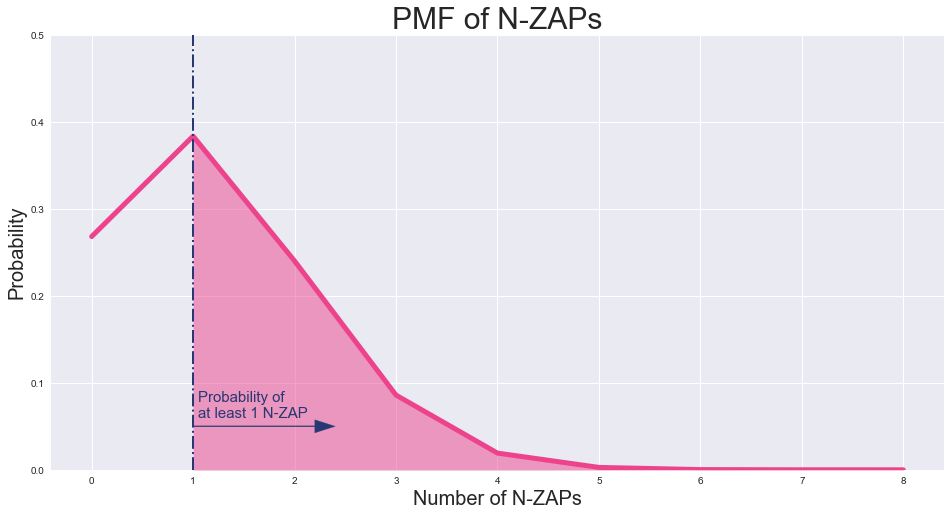

In [47]:
# Plot the distribution again. The code is very specific (arrow position and such) and hard to functionize
fig, ax2 = plt.subplots(figsize=(16, 8))

# Plot the PMF in a pink color scheme
color = twi_pnk
ax2.set_xlabel('Number of N-ZAPs', fontsize=20)
ax2.set_ylabel('Probability', fontsize=20)
# Set y axis manually to fit histogram scale
ax2.set_ylim(0, .5)
# Plot PMF from 0 to 8
x = np.arange(0, 9)
ax2.plot(x, nzap_max.pmf(x), color=color, alpha=1, linewidth=5)
ax2.tick_params(axis='y')
# Fill under curve
ax2.fill_between(x, nzap_max.pmf(x), where= x>0, color=color, alpha=.5)

# Plot a vertical line with arrow, inspired by Samuel
color = twi_blu
ax2.axvline(1, color=color, ls='-.', linewidth=2)
ax2.arrow(1, .05, 1.2, 0, color=color, head_width=.015, head_length=.2)
ax2.text(1.05, .06, 'Probability of\nat least 1 N-ZAP', fontsize=15, color=color)

plt.title('PMF of N-ZAPs', loc='center', fontsize=30, fontweight=0);

In [48]:
# Calculate the probability of seeing at least 1 N-ZAP in a game
1-nzap_max.cdf(0)


0.7318389261938116

There was a 73% chance to see at least one N-ZAP in every game in this time period. This does line up with the community opinion of the N-ZAP being overused. While it is not quite 100%, the phrase "every game" can be expected to be used in hyperbole, and I would certinaly clasifiy almost 3 out of 4 as "most" games.

However this peak usage was only for one week and the N-ZAPs usage was quite varied along the entire timeframe, so I would like to calculate the average probability as well.

In [17]:
# Create a distribution based on mean value
nzap_dist = stats.binom(8, usage_df.loc["N-ZAP '85"].mean())


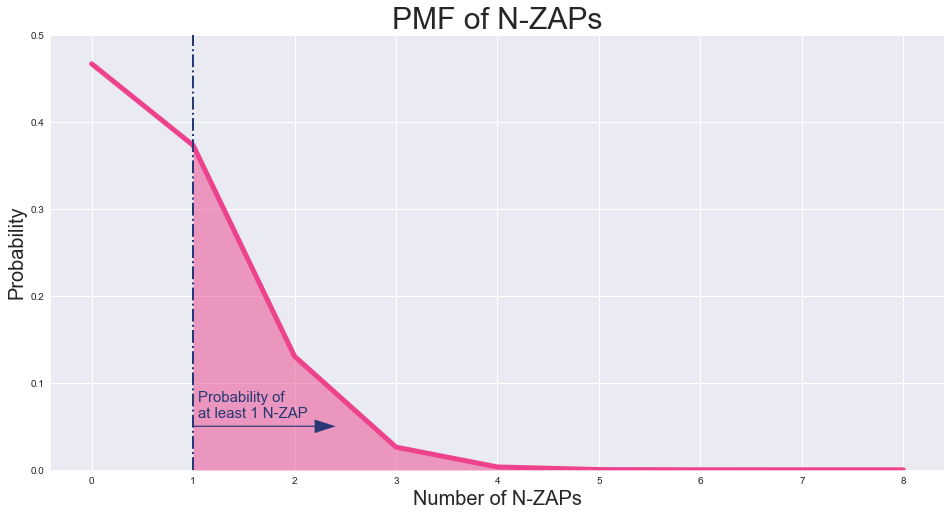

In [18]:
# Plot the distribution again. The code is very specific (arrow position and such) and hard to functionize
fig, ax2 = plt.subplots(figsize=(16, 8))

# Plot the PMF in a pink color scheme
color = twi_pnk
ax2.set_xlabel('Number of N-ZAPs', fontsize=20)
ax2.set_ylabel('Probability', fontsize=20)
# Set y axis manually to fit histogram scale
ax2.set_ylim(0, .5)
# Plot PMF from 0 to 8
x = np.arange(0, 9)
ax2.plot(x, nzap_dist.pmf(x), color=color, alpha=1, linewidth=5)
ax2.tick_params(axis='y')
# Fill under curve
ax2.fill_between(x, nzap_dist.pmf(x), where= x>0, color=color, alpha=.5)

# Plot a vertical line at 1, inspired by Samuel
color = twi_blu
ax2.axvline(1, color=color, ls='-.', linewidth=2)
ax2.arrow(1, .05, 1.2, 0, color=color, head_width=.015, head_length=.2)
ax2.text(1.05, .06, 'Probability of\nat least 1 N-ZAP', fontsize=15, color=color)

plt.title('PMF of N-ZAPs', loc='center', fontsize=30, fontweight=0);

In [19]:
# Calculate the probability of seeing at least 1 N-ZAP in a game
1-nzap_dist.cdf(0)


0.5331903577501327

53% is definitely a lower percent than what the community led me to believe at the time. I would not say that slightly over half qualifies for the intention of "most games", semantically maybe. It is still a very high percent considering the game has over 80 weapons to chose from, but that is nowhere near the perception that it is in every game.

For fun, I will calculate the probability of seeing any given weapon showing up in a game if every weapon was used equally.

In [58]:
# count number of weapons (non null values) for each week, get the mean number of weapons in the game
n = usage_df.count().mean()

# create the distribution if every weapon was used equally
base_dist = stats.binom(8, 1/n)

# calculate probability
1-base_dist.cdf(0)

0.10835217992945512

At just over 10% there is not any point to test N-ZAP usage to hypothetical evenly distributed usage. It clearly shows up way more than than what would be considered average.

### Shooter Testing
Since the top weapons list was packed with shooters (rifles), I will compare the usages of the N-ZAP '85 to the the other shooters that made it into the top weapons list.
* Splattershot
* Tentatek Splattershot
* Forge Splattershot Pro
* Enperry Splat Dualies*

*I also include the Emperry Splat Dualies since it overlaps quite a bit with the N-ZAP in role and playstyle and is more similar to it than the Forge Splattershot Pro.

In [65]:
# Reindex with onlt the shooters
shooter = usage_df.reindex(["N-ZAP '85", 'Splattershot', 'Tentatek Splattershot',
                            'Forge Splattershot Pro', 'Enperry Splat Dualies'])

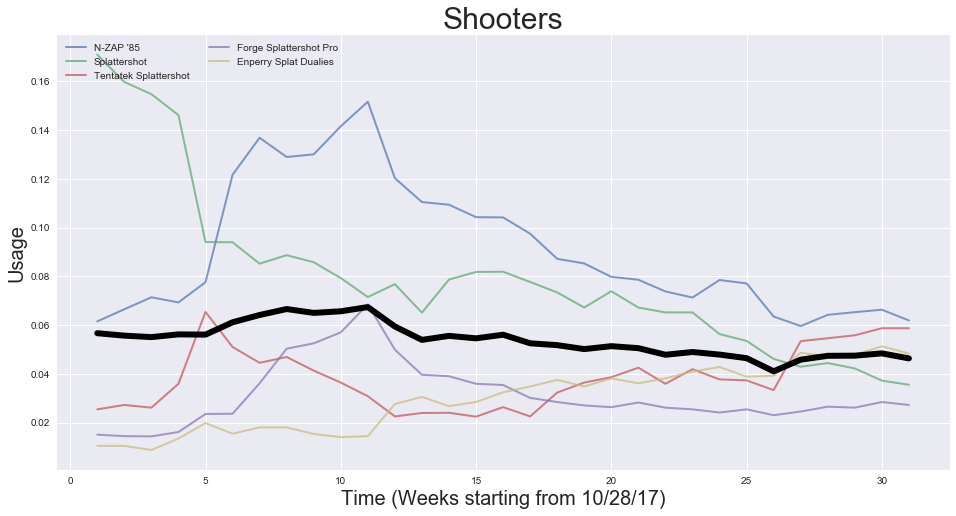

In [66]:
# spaghetti plot the shooters
spaghetti(shooter, 'Shooters')

Now I will test if the N-ZAP '85 is more used than the other weapons.

$$ p_N = P(\text{player uses N-ZAP '85}) $$
$$ p_W = P(\text{player uses Weapon*}) $$

$$ H_0: \ p_N \leq p_W $$
$$ H_a: \ p_N > p_W $$
*Where weapon is replaced by the actual weapon I am testing against.

It looks like the usage of the N-ZAP is well above the mean, so I will compare it to the second most used weapon, the Splattershot.

![img](https://cdn.wikimg.net/en/splatoonwiki/images/6/60/S2_Weapon_Main_Splattershot.png)

### Ink Armor Testing

![img](https://cdn.wikimg.net/en/splatoonwiki/images/9/93/S2_Weapon_Special_Ink_Armor.png)

Ink Armor is a very powerful ability in high-level play since it benefits the whole team and can only be fully utilized by good teamwork. As a result, teams usually want 1 Ink Armor weapon as having multiple does not scale well. Therefore the N-ZAP being overused should mean lower usage of other Ink Armor weapons.

In [67]:
# Selecting all weapons with Ink Armor
ink_armor = ['.96 Gal', 'Classic Squiffer', 'Gold Dynamo Roller', 'H-3 Nozzlenose D', "N-ZAP '85",
             'Splattershot Jr.', 'Tri-Slosher']
ia_df = usage_df.reindex(ink_armor)

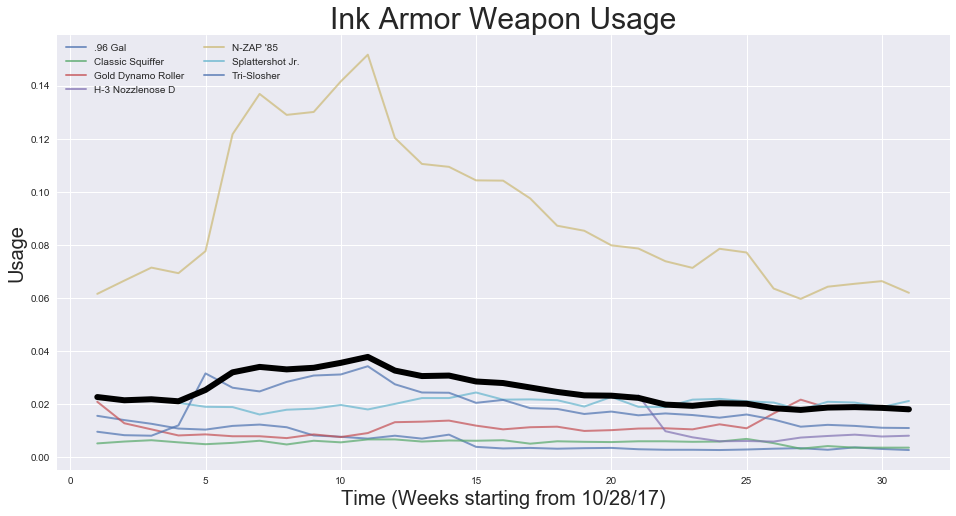

In [61]:
# spaghetti plot the Ink Armor weapons
spaghetti(ia_df, 'Ink Armor Weapon Usage')

It looks like the N-ZAP '85 has more usage than all other ink armor weapons combined. I personally saw a lot of Tri-Sloshers, but looks like they are not as prevalent in high-level play.

![img](https://cdn.wikimg.net/en/splatoonwiki/images/3/32/S2_Weapon_Main_Tri-Slosher.png)

A bucket used to splash paint. Truly a sophisticated and high-tech weapon.

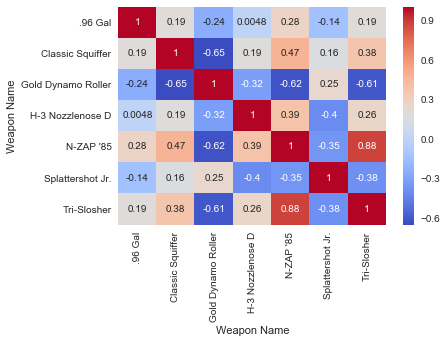

In [62]:
# heatmap the Ink Armor weapons
heatmapper(ia_df)

These correlations are not very useful as the N-ZAP seems to have an almost equal ammount of positive and negative corelations.

It is very interesting that it is such positively correlated with the Tri-Slosher. I think they both increased in usage when players first discovered the power of ink armor. Usage for the N-ZAP dropped due to shifts in the meta while the Tri-Slosher was diretly nerfed (made weaker) through a patch.

I do not know thow to intepret the negative correlation with the Gold Dynamo Roller as I am not personally familiar with that weapon. It is an extremely slow but powerful weapon leading to a very specialized and niche playstyle.

Since the N-ZAP is clearly used more than any other Ink Armor weapon I will test it against all the others combined.

In [24]:
# Extract N-Zap row
nzap = ia_df.reindex(["N-ZAP '85"])
nzap

,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,...,Week 22,Week 23,Week 24,Week 25,Week 26,Week 27,Week 28,Week 29,Week 30,Week 31
Weapon Name,,,,,,,,,,,,,,,,,,,,,
N-ZAP '85,0.0615,0.0665,0.0714,0.0693,0.0776,0.1217,0.1369,0.129,0.1301,0.1416,...,0.0738,0.0713,0.0785,0.0771,0.0635,0.0596,0.0642,0.0653,0.0663,0.0619


In [25]:
# Sum all other columns
others =  ia_df.drop(["N-ZAP '85"])
others = pd.DataFrame(others.sum(), columns=['Other Weapons']).transpose()
others

,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,...,Week 22,Week 23,Week 24,Week 25,Week 26,Week 27,Week 28,Week 29,Week 30,Week 31
Other Weapons,0.074,0.0617,0.0591,0.0566,0.074,0.0697,0.0668,0.0691,0.0716,0.0713,...,0.0643,0.0636,0.0633,0.0634,0.0651,0.0645,0.0661,0.0662,0.0632,0.0641


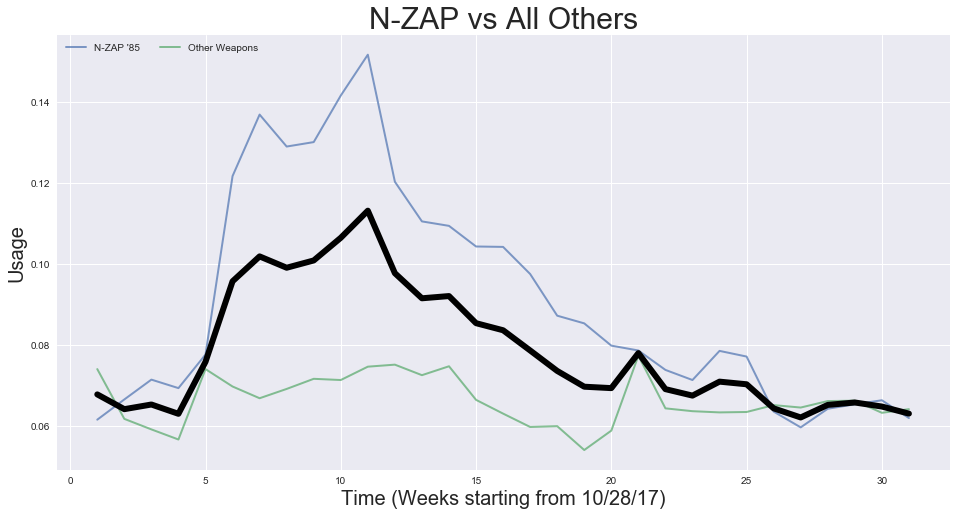

In [64]:
# plot the two lines
spaghetti(pd.concat([nzap, others]), 'N-ZAP vs All Others')

It looks like my initial assumption was correct. While it is fairly obvious that N-ZAP usage is higher, I will stell test if the N-ZAP '85 is more used than all other Ink Armor weapons combined. Because statistics.

#### State the Null Hypothesis
The N-ZAP is *not* used more on average than the other Ink Armor Weapons combined, it is at best, equally used.

$$ p_N = P(\text{player uses N-ZAP '85}) $$
$$ p_I = P(\text{player uses any other Ink Armor weapon}) $$

$$ H_0: \ p_N \leq p_I $$
$$\therefore$$
$$ H_a: \ p_N > p_I $$

I will use a Welch's t-test, which is the following formula recreated in the function t_test.

$$ T = \frac{\text{Difference in sample averages}}{\sqrt{\frac{\hat \sigma^2_A}{n_A} + \frac{\hat \sigma^2_B}{n_B}}} $$

In [84]:
def t_test(sample_1, sample_2, disp=False):
    """ 
    Draws a simple heatmap of a dataframe based on correlation of the rows.
  
    Parameters: 
    sample_1 (lst): a list with values for sample 1.
    sample_2 (lst): a list with values for sample 2.
    disp (bool): print out the values in formated strings
    
    Returns: 
    (tup): contains t-value, degrees of freedom, and p-value
    """
    
    # compute sample size
    n1 = len(sample_1)
    n2 = len(sample_2)
    
    # t-test
    numerator = np.mean(sample_1) - np.mean(sample_2)
    denominator_sq = (np.var(sample_1) / n1) + (np.var(sample_2) / n2)
    t = numerator / np.sqrt(denominator_sq)
    
    # degrees of freedom
    df = (
        ((np.var(sample_1)/n1 + np.var(sample_2)/n2)**(2.0)) / 
        ((np.var(sample_1)/n1)**(2.0)/(n1 - 1) + (np.var(sample_2)/n2)**(2.0)/(n2 - 1))
    )
    
    # create student's t distribution
    students = stats.t(df)
    
    # p-value
    t_abs = abs(t)
    p = students.cdf(-t_abs) + (1 - students.cdf(t_abs))
    
    if disp:
        print("Welch Test Statistic: {:2.2f}".format(t))
        print("Degrees of Freedom for Welch's Test: {:2.2f}".format(df))
        print("p-value: {:2.2f}".format(p_value))
    return (t, df, p)

In [85]:
# A test based on data given in lectures to verifiy accuracy of function
matt_heights = [1.5, 0.9, 0.9, 1.3, 2.1, 1.9, 1.6, 1.4, 2.3, 1.0, 1.5, 0.9, 2.1,
                1.3, 1.4, 2.1, 1.2, 1.7, 1.7, 2.0, 1.6, 1.2, 1.6, 1.7, 1.5]
nick_heights = [1.9, 1.8, 1.3, 2.3, 1.7, 1.9, 2.7, 2.1, 2.2, 1.5, 1.8, 2.0, 1.1,
                1.7, 2.1, 1.5, 2.3, 1.5, 2.0, 2.4, 1.5, 1.4, 1.6, 1.8, 1.0]
t_test(matt_heights, nick_heights, True);

Welch Test Statistic: -2.38
Degrees of Freedom for Welch's Test: 47.97
p-value: 0.00


With a working function, I will now test the N-ZAP against the other weapons.

In [87]:
# Convert dataframes to lists
nzap_lst = nzap.iloc[0].values.tolist()
others_lst = others.iloc[0].values.tolist()

# run t-test and get the degrees of freedom
t, df, p = t_test(nzap_lst, others_lst, True)

Welch Test Statistic: 4.94
Degrees of Freedom for Welch's Test: 32.87
p-value: 0.00


The p-value is zero?

In [92]:
# show the entire p-value
p

2.1945153999983763e-05

P is an extremely small number and thus does not show up in the formattted version. Maybe a plot will help.

Text(0.5, 1.0, 'p-value Reigon')

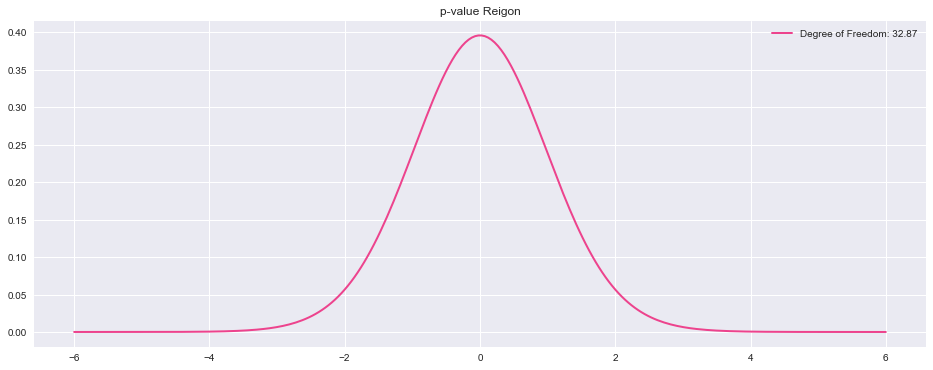

In [91]:
# plot my df curve and try to shade
x = np.linspace(-6, 6, num=250)

fig, ax = plt.subplots(1, figsize=(16, 6))
students = stats.t(df)
ax.plot(x, students.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(df), color=twi_pnk)
_ = ax.fill_between(x, students.pdf(x), where=(x >= abs(t)), color=twi_pnk, alpha=0.25)
_ = ax.fill_between(x, students.pdf(x), where=(x <= - abs(t)), color=twi_pnk, alpha=0.25)
ax.legend()
ax.set_title("p-value Reigon")

As shown on this plot, at positive and negative t-value, 4.94, the tails are so thin the shading is not visible. Thus I can very confidently reject my null hypothesis.